Compare performance of CAE with 16x32b floats vs. 32x16b floats vs. 8x64b in latent space.

In [1]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255.

1. 16x32b

In [28]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation
from keras.utils import plot_model

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x  = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv1')(enc_input)
x  = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv2')(x)
x = Flatten(name='flatten')(x)
latent = Dense(units=16, activation='sigmoid', name='latent')(x)

# decoder
dec_input = Input(shape=(16,), name='dec_input')
x = Dense(units=7*7*8, activation='relu', name='dense')(dec_input)
x = Reshape(target_shape=(7,7,8), name='reshape')(x)
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv1')(x)
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv2')(x)
dec_output = Conv2DTranspose(filters=1, kernel_size=3, padding='same', name='pt_conv')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))

model.compile(loss='mse', optimizer='adam')
# print(model.summary())
print(model.layers[3].dtype)
print(model.layers[4].dtype)

float32
float32


Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - val_loss: 0.0165
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - val_loss: 0.0127
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0127 - val_loss: 0.0119
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 9/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.010

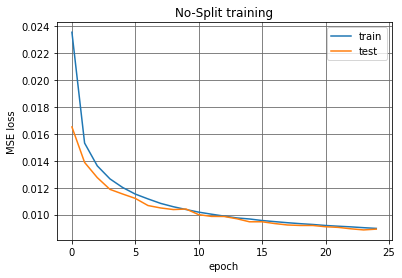

In [3]:
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=25, batch_size=32)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('No-Split training')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

2. 32x16b

In [4]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation
from keras.utils import plot_model

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x  = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv1')(enc_input)
x  = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv2')(x)
x = Flatten(name='flatten')(x)
latent = Dense(units=32, activation='sigmoid', name='latent', dtype='float16')(x)

# decoder
dec_input = Input(shape=(32,), name='dec_input')
x = Dense(units=7*7*8, activation='relu', name='dense')(dec_input)
x = Reshape(target_shape=(7,7,8), name='reshape')(x)
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv1')(x)
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv2')(x)
dec_output = Conv2DTranspose(filters=1, kernel_size=3, padding='same', name='pt_conv')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))
model.compile(loss='mse', optimizer='adam')

# print(model.summary())
print(model.layers[3].dtype)
print(model.layers[4].dtype)

float32
float16


Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - val_loss: 0.0268
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0264 - val_loss: 0.0272
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0273 - val_loss: 0.0288
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - val_loss: 0.0448
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - val_loss: 0.0632
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - val_loss: 0.0585
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0601 - val_loss: 0.0677
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.059

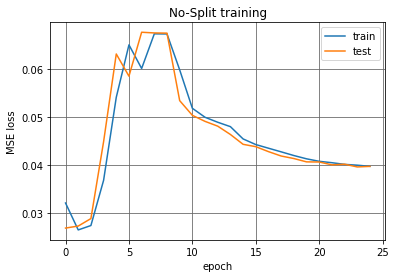

In [5]:
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=25, batch_size=32)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('No-Split training')
plt.ylabel('MSE loss')
# plt.ylim((0.005, 0.02))
plt.xlabel('epoch')
# plt.xlim((0, 50))
plt.legend(['train', 'test'], loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

3. 8x64b

In [6]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation
from keras.utils import plot_model

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x  = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv1')(enc_input)
x  = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv2')(x)
x = Flatten(name='flatten')(x)
latent = Dense(units=8, activation='sigmoid', name='latent', dtype='float64')(x)

# decoder
dec_input = Input(shape=(8,), name='dec_input')
x = Dense(units=7*7*8, activation='relu', name='dense')(dec_input)
x = Reshape(target_shape=(7,7,8), name='reshape')(x)
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv1')(x)
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv2')(x)
dec_output = Conv2DTranspose(filters=1, kernel_size=3, padding='same', name='pt_conv')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))
model.compile(loss='mse', optimizer='adam')

# print(model.summary())
print(model.layers[3].dtype)
print(model.layers[4].dtype)

float32
float64


Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0331 - val_loss: 0.0256
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - val_loss: 0.0235
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0232 - val_loss: 0.0224
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - val_loss: 0.0215
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0215 - val_loss: 0.0208
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0210 - val_loss: 0.0210
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - val_loss: 0.0202
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0203 - val_loss: 0.0200
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.019

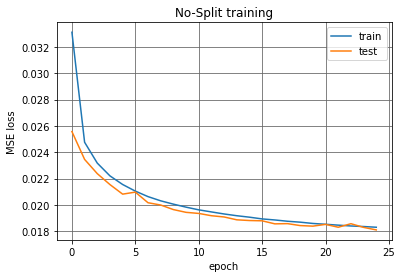

In [7]:
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=25, batch_size=32)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('No-Split training')
plt.ylabel('MSE loss')
# plt.ylim((0.005, 0.02))
plt.xlabel('epoch')
# plt.xlim((0, 50))
plt.legend(['train', 'test'], loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

4. Pretrained 16x32b weights on 16x16b model.

In [2]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation
from keras.utils import plot_model

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x  = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv1')(enc_input)
x  = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='conv2')(x)
x = Flatten(name='flatten')(x)
latent = Dense(units=16, activation='sigmoid', name='latent', dtype='float16')(x)

# decoder
dec_input = Input(shape=(16,), name='dec_input')
x = Dense(units=7*7*8, activation='relu', name='dense')(dec_input)
x = Reshape(target_shape=(7,7,8), name='reshape')(x)
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv1')(x)
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same', name='deconv2')(x)
dec_output = Conv2DTranspose(filters=1, kernel_size=3, padding='same', name='pt_conv')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))

model.load_weights('../weights/40_CAE16_epoch50_weights.h5')
model.compile(loss='mse', optimizer='adam')

print(model.layers[3].dtype)
print(model.layers[4].dtype)

float32
float16


Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - val_loss: 0.0137
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - val_loss: 0.0123
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0131 - val_loss: 0.0120
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0122 - val_loss: 0.0196
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.012

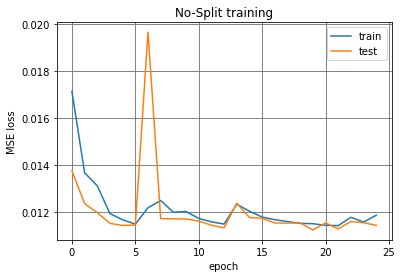

In [3]:
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=25, batch_size=32)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('No-Split training')
plt.ylabel('MSE loss')
# plt.ylim((0.005, 0.02))
plt.xlabel('epoch')
# plt.xlim((0, 50))
plt.legend(['train', 'test'], loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')